In [1]:
import os 
os.chdir('..')

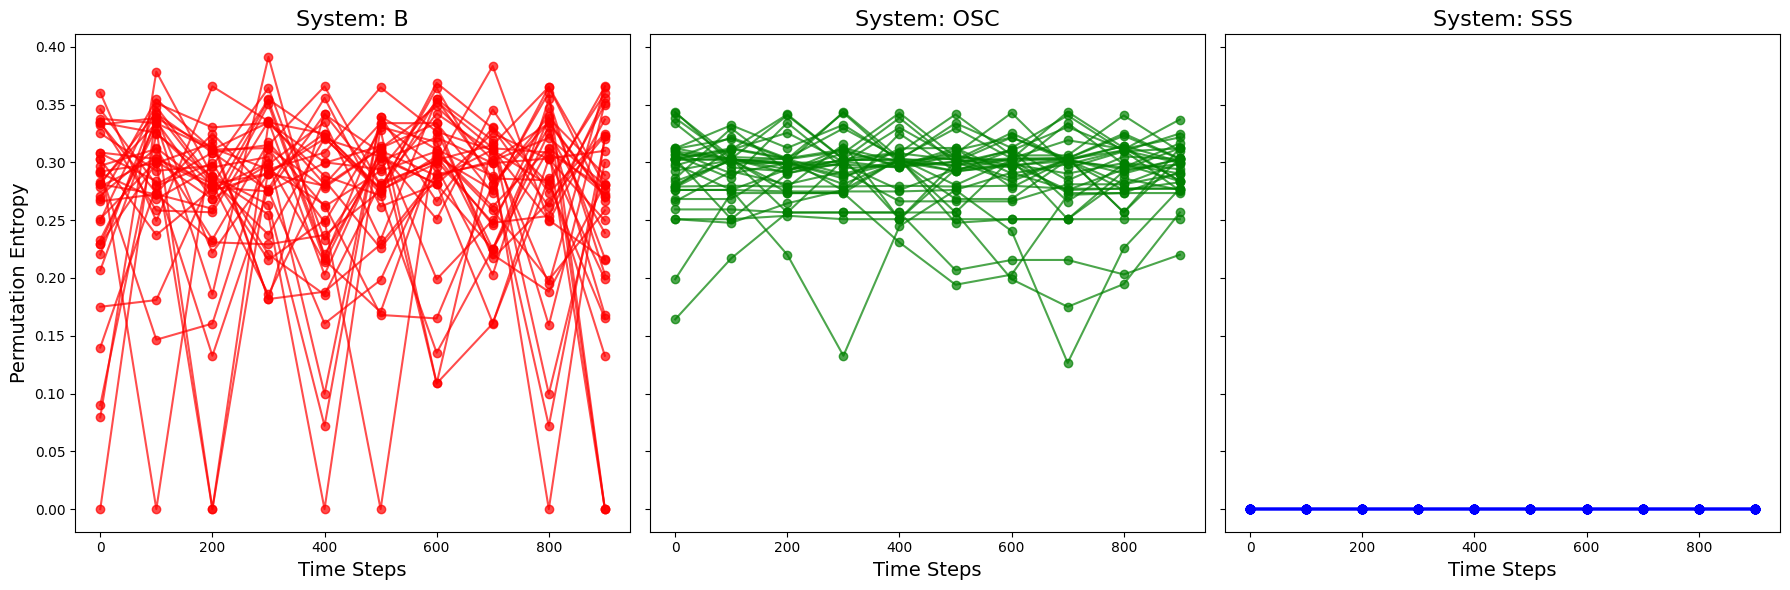

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from utils.data_utils import load_data, split_data
from utils.visualizer import *
from ordpy import permutation_entropy  # Assuming this is a function you have or can implement

##########Calculate Permutation Entropy below #################
dx = 4
time_window_size = 100  
# i.e., For 100 points in each segment, we calculate one PE value

# Divide the total data into non-overlapping segments
num_segments = 1000 // time_window_size

# Function to compute permutation entropy in each segment
def time_window_pe(trajectory, dx, num_segments):
    pe_values = []
    for i in range(num_segments):
        segments = trajectory[i * time_window_size:(i + 1) * time_window_size]
        pe_value = permutation_entropy(segments, dx=dx)  
        pe_values.append(pe_value)
    return pe_values
##########################################################

# Define system types and parameters
system_types = ['B', 'OSC', 'SSS']
V = np.inf
max_samples = 1

# Load the data
data, labels, beta_epsilon_pairs = load_data(system_types, V, max_samples)
train_data, test_data, train_labels, test_labels, train_pairs, test_pairs = split_data(data, labels, beta_epsilon_pairs, option="option2", test_size = 0, balanced=True)

colors = {'B': 'r', 'OSC': 'g', 'SSS': 'b'}  # Define different colors for each system type

#################################################
# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each system type and plot in the corresponding subplot
for i, system_type in enumerate(system_types):
    system_indices = [idx for idx, label in enumerate(train_labels) if label == system_type]  # Filter train data by system type
    color = colors[system_type]  # Get the color for the current system type
    
    for idx in system_indices:
        trajectory = train_data[idx]  # Extract the trajectory (e.g., 'x' dimension)
        
        # Compute permutation entropy with sliding window
        pe_values = time_window_pe(trajectory, dx, num_segments)
        
        time_steps = range(0, len(trajectory)-1, time_window_size)
        axs[i].plot(time_steps, pe_values, '-o', alpha=0.7, color=color)  # Plot in the corresponding subplot
        axs[i].set_title(f'System: {system_type}', fontsize=16)
        axs[i].set_xlabel('Time Steps', fontsize=14)

# Set common ylabel for all subplots
axs[0].set_ylabel('Permutation Entropy', fontsize=14)

plt.tight_layout()
plt.show()

